# IndabaX SOUTH SUDAN AI HACKATHON
    WEATHER IMAGERY FORECAST IDENTIFIER

### Step 1: Import Libraries

In [10]:
# Import Essential Libraries
import tensorflow as tf # noqa: F401
from tensorflow.keras import layers, models, callbacks # noqa: F401
from tensorflow.keras.applications import EfficientNetB0 # noqa: F401
from tensorflow.keras.preprocessing import image_dataset_from_directory # noqa: F401
import pandas as pd # noqa: F401
import numpy as np # noqa: F401
import os # noqa: F401
import matplotlib.pyplot as plt # noqa: F401
import ipywidgets as widgets # noqa: F401
from IPython.display import display, clear_output # noqa: F401

### 2. Set Up File Paths

In [11]:
# Set Up File Paths
dataset_path = r"../indabax-south-sudan-intermediate"
train_dir = os.path.join(dataset_path, "./weather_dataset")
test_dir = os.path.join(dataset_path, "./test")

### 3. Load and Prepare Data

In [12]:
# Load and Prepare Data
train_data = image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=123
)

val_data = image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=123
)

test_data = image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32,
    shuffle=False
)

class_names = train_data.class_names
print("Class names:", class_names)

Found 1125 files belonging to 4 classes.
Using 900 files for training.
Found 1125 files belonging to 4 classes.
Using 225 files for validation.
Found 226 files belonging to 4 classes.
Class names: ['Cloudy', 'Rain', 'Shine', 'Sunrise']


### 4. Build the High-Accuracy Model

In [13]:
# Build the High-Accuracy Model
base_model = EfficientNetB0(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze pre-trained layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),  # Helps prevent overfitting
    layers.Dense(len(class_names), activation='softmax')
])

### 5. Compile with Optimal Settings

In [14]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 6. Train with Accuracy Boosters

In [15]:
# Train with Accuracy Boosters
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=2,
    min_lr=0.00001
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5511 - loss: 1.1336 - val_accuracy: 0.8578 - val_loss: 0.6426 - learning_rate: 1.0000e-04
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 958ms/step - accuracy: 0.8695 - loss: 0.5411 - val_accuracy: 0.9156 - val_loss: 0.4034 - learning_rate: 1.0000e-04
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9330 - loss: 0.3483 - val_accuracy: 0.9289 - val_loss: 0.2987 - learning_rate: 1.0000e-04
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 981ms/step - accuracy: 0.9446 - loss: 0.2472 - val_accuracy: 0.9467 - val_loss: 0.2403 - learning_rate: 1.0000e-04
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 984ms/step - accuracy: 0.9578 - loss: 0.1984 - val_accuracy: 0.9600 - val_loss: 0.2072 - learning_rate: 1.0000e-04
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9745 - loss: 0.1439 - val_accuracy: 0.9556 - val_loss: 0.1852 - learning_rate: 1.0000e-04
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 961ms/step - accuracy: 0.

In [18]:
# Evaluate the model
val_loss, val_acc = model.evaluate(val_data)
print(f"\nFinal Validation Accuracy: {val_acc*100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 686ms/step - accuracy: 0.9693 - loss: 0.1796

Final Validation Accuracy: 96.00%


### 7. Verify High Accuracy by testing images present


Displaying one random example from each class with predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


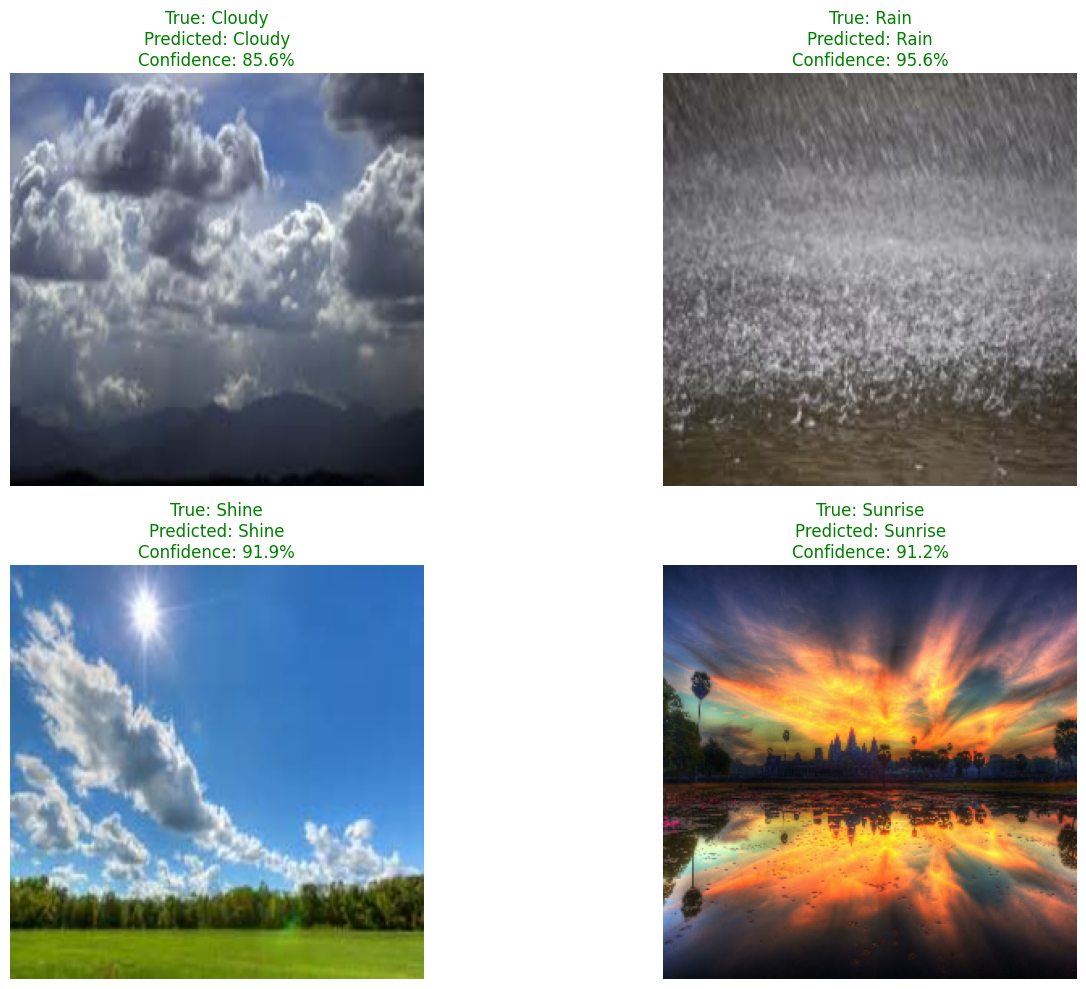

In [16]:
# SHOW ONE RANDOM PREDICTION FROM EACH CLASS
def plot_one_random_per_class(model, dataset, class_names):
    """
    Shows one random example from each class with its prediction
    """
    plt.figure(figsize=(15, 10))
    
    # We'll store one example per class
    class_examples = {class_name: None for class_name in class_names}
    
    # Go through the dataset to find examples of each class
    for images, labels in dataset:
        for i in range(len(images)):
            label_idx = labels[i].numpy()
            class_name = class_names[label_idx]
            
            # If we haven't found an example for this class yet
            if class_examples[class_name] is None:
                # Make prediction for this image
                prediction = model.predict(tf.expand_dims(images[i], 0))
                predicted_class = class_names[np.argmax(prediction)]
                confidence = np.max(prediction) * 100
                
                # Store the example
                class_examples[class_name] = {
                    'image': images[i].numpy(),
                    'true_class': class_name,
                    'predicted_class': predicted_class,
                    'confidence': confidence,
                    'correct': (class_name == predicted_class)
                }
        
        # Check if we've found all classes
        if all(v is not None for v in class_examples.values()):
            break
    
    # Plot one example per class
    for idx, class_name in enumerate(class_names):
        example = class_examples[class_name]
        
        plt.subplot(2, 2, idx+1)  # Assuming 4 classes
        plt.imshow(example['image'].astype('uint8'))
        
        # Use green for correct predictions, red for incorrect
        title_color = 'green' if example['correct'] else 'red'
        
        plt.title(
            f"True: {example['true_class']}\n"
            f"Predicted: {example['predicted_class']}\n"
            f"Confidence: {example['confidence']:.1f}%",
            color=title_color
        )
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

print("\nDisplaying one random example from each class with predictions...")
plot_one_random_per_class(model, val_data, class_names)

### 8. Create CSV Submission

In [17]:
test_predictions = model.predict(test_data)
predicted_classes = np.argmax(test_predictions, axis=1)

submission = pd.DataFrame({
    'id': range(1, 227),  # IDs from 1 to 226
    'label': [class_names[i] for i in predicted_classes]
})

submission.to_csv('submission.csv', index=False)
print("\nSubmission file created successfully!")

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step 

Submission file created successfully!
